# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [2]:
import re
import numpy as np
import pandas as pd
df_header = pd.DataFrame(columns = ['Attribute', 'Description'])
with open('review_ratings_headers.txt', 'r') as f:
    for line in f:
        df_header = df_header.append(pd.DataFrame({'Attribute': [re.split("[:\n]", line)[0][9:]],
                                 'Description':[re.split("[:\n]", line)[1]]}), ignore_index=True)
        
print(df_header)

   Attribute                                 Description
0         1                              Unique user id 
1         2                 Average ratings on churches 
2         3                  Average ratings on resorts 
3         4                  Average ratings on beaches 
4         5                    Average ratings on parks 
5         6                 Average ratings on theatres 
6         7                  Average ratings on museums 
7         8                    Average ratings on malls 
8         9                      Average ratings on zoo 
9        10              Average ratings on restaurants 
10       11                Average ratings on pubs/bars 
11       12           Average ratings on local services 
12       13       Average ratings on burger/pizza shops 
13       14    Average ratings on hotels/other lodgings 
14       15               Average ratings on juice bars 
15       16            Average ratings on art galleries 
16       17              Averag

**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

In [88]:
header = []
with open('review_ratings_headers.txt', 'r') as f:
    line = f.readline()
    header.append(re.sub("[/\s]", "_", re.split("[:\n]", line)[1].strip()[7:]))
    for line in f:
        header.append(re.sub("[/\s]", "_", re.split("[:\n]", line)[1].strip()[19:]))

header_2 = []

for string in header: 
    string = re.sub("&","",string)
    string = re.sub("__","_",string)

    header_2.append(string)

print(header_2)

['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']


In [106]:
data.columns

Index(['id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'services', 'shops',
       'lodgings', 'bars', 'galleries', 'clubs', 'pools', 'gyms', 'bakeries',
       'spas', 'cafes', 'points', 'monuments', 'gardens'],
      dtype='object')

In [94]:
char_ = 0
for h in header_2:
    if "_" in h : char_+=1

Question 1: How many headers are there with 2 or more words combined by an underscore?

In [95]:
char_

11

In [91]:
char_total = 0
for h in header_2:
    for c in h:
        if c == '_': char_total +=1

Question 2: How many underscores are there in all of the headers?

In [92]:
char_total

13

**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [120]:
data =pd.read_csv('review_ratings.csv', skiprows= 1, header=None)
data.columns = header_2
data[0:2]

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 3343,1.49,2.75,2.88,2.91,5.00,5.00,1.56,1.53,1.52,...,0.77,0.78,0.80,1.16,0.76,0.74,0.73,0.74,0.77,0.80
1,User 5248,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,...,5.0,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84,0.84


Question 3: How many rows are in the ratings dataset?

In [116]:
data.shape[0]

4624

**Task:** Import review_ratings_with_headers.csv

In [121]:
data_2 = pd.read_csv('review_ratings.csv')

**Task:** Explore data types in the dataset

In [125]:
data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries             object
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 4: What data type is local_services?

float

**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

In [133]:
art_galleries_float = []
for a in list(data.art_galleries):
    try:
        a = float(a)
    except Exception as e:
        print (a)
        a = 0
        pass
    art_galleries_float.append(a)

qh


In [136]:
data.art_galleries = art_galleries_float
data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 5: What was the string that contained the special characters?

'qh'

Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

In [137]:
data.art_galleries.mean()

2.203406141868526

**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [145]:
data = data.fillna(0)
data.isnull().values.any()
data.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,...,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000
mean,1.455822,2.317331,2.482007,2.796265,2.953977,2.893343,3.354189,2.548054,3.144027,2.841808,...,2.203406,1.194271,0.954007,0.825424,0.960783,0.993854,0.973227,1.758545,1.535264,1.561068
std,0.819186,1.418414,1.242288,1.313560,1.338313,1.281503,1.413699,1.112429,1.357523,1.309914,...,1.719475,1.108272,0.980365,0.953209,1.186662,1.188229,0.931104,1.598310,1.314480,1.164068
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.720000,1.770000,1.780000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.750000,0.800000,0.890000
50%,1.330000,1.890000,2.060000,2.450000,2.660000,2.685000,3.230000,2.190000,2.820000,2.690000,...,1.320000,0.800000,0.740000,0.680000,0.690000,0.690000,0.770000,1.040000,1.070000,1.290000
75%,1.810000,2.670000,2.730000,4.110000,4.310000,3.830000,5.000000,3.200000,5.000000,3.560000,...,4.690000,1.160000,0.920000,0.840000,0.860000,0.860000,1.010000,2.080000,1.560000,1.650000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Question 7: What is the IQR of ratings for resorts?

In [146]:
2.67-1.36

1.3099999999999998

**Task:** Import review_ratings_processed.csv

In [3]:
data_processed = pd.read_csv('review_ratings_processed.csv')

In [4]:
data_processed.shape

(4624, 25)

**Task:** Find the variables that are most correlated with each other

In [5]:
print(data_processed.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11])

theatres               parks             0.628782
pubs_bars              restaurants       0.567785
                       zoo               0.554357
zoo                    restaurants       0.545238
swimming_pools         gyms              0.521543
hotels_other_lodgings  juice_bars        0.515170
gardens                churches          0.499185
museums                theatres          0.484519
monuments              view_points       0.470440
pubs_bars              local_services    0.466849
dtype: float64


Question 8: Which variables are included in the **top 10** **most** correlated (based on absolute value)? 

(zoo, restaurants );(hotels_other_lodgings, juice_bars); (theatres, parks)

**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

In [6]:
data_processed[0:4]
dg = data_processed.groupby(pd.cut(data_processed['juice_bars'], 
                              bins = np.linspace(data_processed['juice_bars'].min(),
                                                data_processed['juice_bars'].max(), 11) ))['malls'].mean()
print (dg)

juice_bars
(0.76, 1.184]     3.033536
(1.184, 1.608]    3.514370
(1.608, 2.032]    3.607063
(2.032, 2.456]    3.015440
(2.456, 2.88]     3.269082
(2.88, 3.304]     3.588889
(3.304, 3.728]    4.161667
(3.728, 4.152]    4.714019
(4.152, 4.576]    3.186316
(4.576, 5.0]      3.446805
Name: malls, dtype: float64


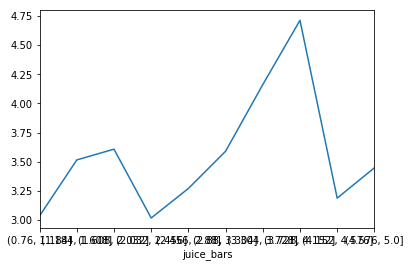

In [7]:
% matplotlib inline
from matplotlib import pyplot as plt

dg.plot.line()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydot

Question 9: Which chart below matches mean **mall** rating by **juice_bar** bins?

None of the above

**Task:** Split dataset into features that include all variables except **juice_bars** and user_id

In [9]:
data_processed.index = data_processed.user_id
data_processed.drop('user_id', axis = 1, inplace=True)
data_processed.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
user_id,,,,,,,,,,,,,,,,,,,,,
User 3343,1.49,2.75,2.88,2.91,5.00,5.00,1.56,1.53,1.52,1.53,...,0.77,0.78,0.80,1.16,0.76,0.74,0.73,0.74,0.77,0.80
User 5248,0.86,0.89,1.66,1.63,1.63,1.63,5.00,1.67,2.43,2.99,...,5.00,0.66,0.65,0.64,0.74,0.68,0.86,0.85,0.84,0.84
User 3364,0.73,0.76,0.80,2.06,2.92,5.00,5.00,1.62,5.00,1.56,...,1.83,0.75,0.74,0.74,0.77,1.08,0.73,0.72,0.71,0.71
User 2874,0.58,5.00,1.33,1.32,1.34,1.36,5.00,5.00,5.00,2.88,...,0.79,0.78,0.80,0.81,1.02,0.57,0.52,0.51,0.54,0.56
User 5055,1.80,1.74,1.75,5.00,5.00,1.69,1.67,1.66,1.67,2.06,...,1.10,1.13,1.15,1.37,0.63,0.62,0.63,5.00,0.69,1.71


In [10]:
X = data_processed.loc[:, ~data_processed.columns.isin(['juice_bars'])] 
y = data_processed.loc[:, 'juice_bars']
feature_list = data_processed.drop('juice_bars', axis=1).columns


In [11]:
feature_list

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'art_galleries',
       'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas',
       'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [12]:
seed =42
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state =seed)

print ('X_train ', X_train.shape)
print ('X_test ', X_test.shape)
print ('y_train ', y_train.shape)
print ('y_test ', y_test.shape)

X_train  (3699, 23)
X_test  (925, 23)
y_train  (3699,)
y_test  (925,)


In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [14]:
regressor = RandomForestRegressor(n_estimators=20, random_state=seed)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.364488108108
Mean Squared Error: 0.636080844054
Root Mean Squared Error: 0.797546766061


Question 10: What R-Squared value did the model achieve on the test set?

In [16]:
print ('R2 value on test: ',metrics.r2_score(y_test, y_pred))

R2 value on test:  0.754234045606


**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [17]:
y_test_df = pd.DataFrame({'juice_bars_actual': y_test.values}, index = y_test.index)
y_test_df['juice_bars_pred'] = y_pred

y_train_df = pd.DataFrame({'juice_bars_actual': y_train.values}, index = y_train.index)
y_train_df['juice_bars_pred'] = regressor.predict(X_train)

y = pd.concat([y_train_df, y_test_df], axis=0)

print (y.head())

           juice_bars_actual  juice_bars_pred
user_id                                      
User 3819               1.51           1.5035
User 2209               1.25           1.3115
User 5141               1.33           1.3350
User 1815               1.49           1.4780
User 321                0.80           0.7995


In [18]:
data_final = data_processed.join(y['juice_bars_pred'])
print (data_final.head())

           churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
user_id                                                                        
User 3343      1.49     2.75     2.88   2.91      5.00     5.00   1.56  1.53   
User 5248      0.86     0.89     1.66   1.63      1.63     1.63   5.00  1.67   
User 3364      0.73     0.76     0.80   2.06      2.92     5.00   5.00  1.62   
User 2874      0.58     5.00     1.33   1.32      1.34     1.36   5.00  5.00   
User 5055      1.80     1.74     1.75   5.00      5.00     1.69   1.67  1.66   

           restaurants  pubs_bars       ...         dance_clubs  \
user_id                                 ...                       
User 3343         1.52       1.53       ...                0.78   
User 5248         2.43       2.99       ...                0.66   
User 3364         5.00       1.56       ...                0.75   
User 2874         5.00       2.88       ...                0.78   
User 5055         1.67       2.06    

**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [19]:
data_final['sq_res'] = (data_final.juice_bars_pred - data_final.juice_bars)**2
data_final = data_final.sort_values('sq_res', ascending = False)

print (data_final.head())

           churches  resorts  beaches  parks  theatres  museums  malls   zoo  \
user_id                                                                        
User 1578      0.59     0.63     1.47   1.46      1.48     1.49   5.00  2.58   
User 634       1.38     1.40     1.42   2.66      2.65     3.27   3.29  3.31   
User 4288      0.00     1.44     1.42   1.42      1.45     1.49   2.71  2.70   
User 2122      2.03     2.60     2.54   5.00      5.00     3.26   3.26  3.27   
User 5356      2.08     2.28     1.68   1.27      1.24     1.23   1.24  1.41   

           restaurants  pubs_bars    ...     swimming_pools  gyms  bakeries  \
user_id                              ...                                      
User 1578         3.18       3.16    ...               0.76  5.00      0.99   
User 634          5.00       5.00    ...               0.54  0.00      0.00   
User 4288         3.32       3.32    ...               1.01  1.01      5.00   
User 2122         2.85       2.86    ...    

Question 11: Which IDs are included in the **top 10** losses as measured by squared residual

2122, 634, 2733

**Task:** Extract the first tree/estimator from the Random Forest Model

In [20]:
from IPython import display
tree = regressor.estimators_[0]

**Task:** Plot the decision tree with **max depth of 3**

In [21]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 2, max_depth=3)

(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Question 12: Which variable does the tree split on **first**?

hotels_other_lodgings

**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [61]:
import scipy

data_processed.fillna(0, inplace=True)

data_mt = scipy.sparse.csr_matrix(data_processed.values.T)

In [59]:
#print(data_mt.shape)
swimming_pool_index  = list(data_processed.columns).index('swimming_pools')

In [62]:
data_processed_transposed = data_processed.transpose()

**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [51]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(data_mt)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [52]:
distances, indices = knn.kneighbors(data_processed_transposed.iloc[swimming_pool_index ,:].values.reshape(1,-1), 
                                    n_neighbors = 6)

Question 13: Which categories are included in the top 5 nearest neighbors to **swimming_pools**?

In [68]:
data_processed.columns[indices.flatten()][1:]

Index(['gyms', 'dance_clubs', 'churches', 'gardens', 'burger_pizza_shops'], dtype='object')